In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_original = pd.read_csv(r"..\data\venda_cursos_online.csv.txt",index_col=0)

In [3]:
df_original.head()

,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data
ID,,,,
1,Introdução à Programação em Python,50,39.9,2023-01-01
2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02
3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03
4,Introdução ao Machine Learning,15,99.9,2023-01-04
5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1 to 25
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nome do Curso         25 non-null     object 
 1   Quantidade de Vendas  25 non-null     int64  
 2   Preço Unitário        25 non-null     float64
 3   Data                  25 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1000.0+ bytes


In [8]:
# Vou alterar o tipo de dados da coluna 'Data' para facilitar manipulações futuras
df_original['Data'] = pd.to_datetime(df_original['Data'])

## <a> Observando estatísticas descritivas e criação de novas colunas

In [5]:
df_original.describe()

,Quantidade de Vendas,Preço Unitário
count,25.000000,25.000000
mean,17.960000,83.900000
std,10.921996,21.984843
min,5.000000,39.900000
25%,10.000000,69.900000
50%,15.000000,79.900000
75%,20.000000,99.900000
max,50.000000,119.900000


In [6]:
mediana_qtd = df_original['Quantidade de Vendas'].median()
mediana_preco = df_original['Preço Unitário'].median()
print(f'As medianas das colunas Quantidade de vendas e Preço Unitário são respectivamente: {mediana_qtd} e {mediana_preco}')

As medianas das colunas Quantidade de vendas e Preço Unitário são respectivamente: 15.0 e 79.9


Vou criar um novo Dataframe retirando o fator tempo, para gerar novos insights, como: vendas totais, receita gerada.
Esse novo dataframe vai me ajudar a responder outras questões posteriormente.

In [9]:
# Criando uma series com nome do Curso e somando a Quantidade de Vendas
vendas_totais_curso = df_original.groupby('Nome do Curso')\
    ['Quantidade de Vendas'].sum()
# Criando uma series de precos unitarios
precos = df_original.drop_duplicates(subset='Nome do Curso')\
    .set_index('Nome do Curso')['Preço Unitário']
#Juntando preços unitarios a quantidade total de cursos, transformando em DF
result = pd.concat([vendas_totais_curso, precos], axis=1).reset_index()

result.columns = ['Nome do Curso', 'Quantidade Total de Vendas', 'Preço Unitário']

df_Stime = result.sort_values('Quantidade Total de Vendas', ascending=False)\
    .reset_index().drop('index',axis=1)

df_Stime = df_Stime.assign(Receita_Gerada=df_Stime['Quantidade Total de Vendas'] * df_Stime['Preço Unitário'])

df_Stime

,Nome do Curso,Quantidade Total de Vendas,Preço Unitário,Receita_Gerada
0,Introdução à Programação em Python,95,39.9,3790.5
1,Desenvolvimento Web com HTML e CSS,75,59.9,4492.5
2,Desenvolvimento Mobile com React Native,63,69.9,4403.7
3,JavaScript Avançado: Frameworks e Bibliotecas,53,79.9,4234.7
4,Introdução ao Machine Learning,37,99.9,3696.3
5,Cloud Computing com AWS,37,99.9,3696.3
6,Banco de Dados SQL e NoSQL,30,79.9,2397.0
7,Arquitetura de Microserviços,30,89.9,2697.0
8,Segurança da Informação: Fundamentos,15,109.9,1648.5
9,DevOps: Integração e Entrega Contínua,14,119.9,1678.6


Agora que criei novas colunas vou observar as estatisticas descritivas novamente

In [10]:
df_Stime.describe()

,Quantidade Total de Vendas,Preço Unitário,Receita_Gerada
count,10.00000,10.000000,10.00000
mean,44.90000,84.900000,3273.51000
std,26.30357,24.152295,1085.09921
min,14.00000,39.900000,1648.50000
25%,30.00000,72.400000,2472.00000
50%,37.00000,84.900000,3696.30000
75%,60.50000,99.900000,4123.65000
max,95.00000,119.900000,4492.50000


In [26]:
mediana_qtd_tot = df_Stime['Quantidade Total de Vendas'].median()
mediana_preco = df_Stime['Preço Unitário'].median()
mediana_receita = df_Stime['Receita_Gerada'].median()
print(f'As medianas das novas colunas:\n Quantidade Total de vendas | {mediana_qtd_tot} \n Preço Unitário | {mediana_preco} \n Receita Total | {mediana_receita} ')

As medianas das novas colunas:
 Quantidade Total de vendas | 37.0 
 Preço Unitário | 84.9 
 Receita Total | 3696.3 


## <a> 1. Receita total gerada pela venda dos cursos </a>

In [11]:
receita_total = (df_original["Quantidade de Vendas"] * df_original["Preço Unitário"]).sum()
print(f"A receita_total gerada pelos cursos foi de: R$ {receita_total:.2f}")

A receita_total gerada pelos cursos foi de: R$ 32735.10


## <a> 2. Curso com o maior número de vendas </a>

In [12]:
max_venda = df_Stime.loc[df_Stime['Quantidade Total de Vendas']\
                                    .idxmax()]
print(f"O curso mais vendido foi {max_venda['Nome do Curso']} com {max_venda['Quantidade Total de Vendas']} vendas")

O curso mais vendido foi Introdução à Programação em Python com 95 vendas


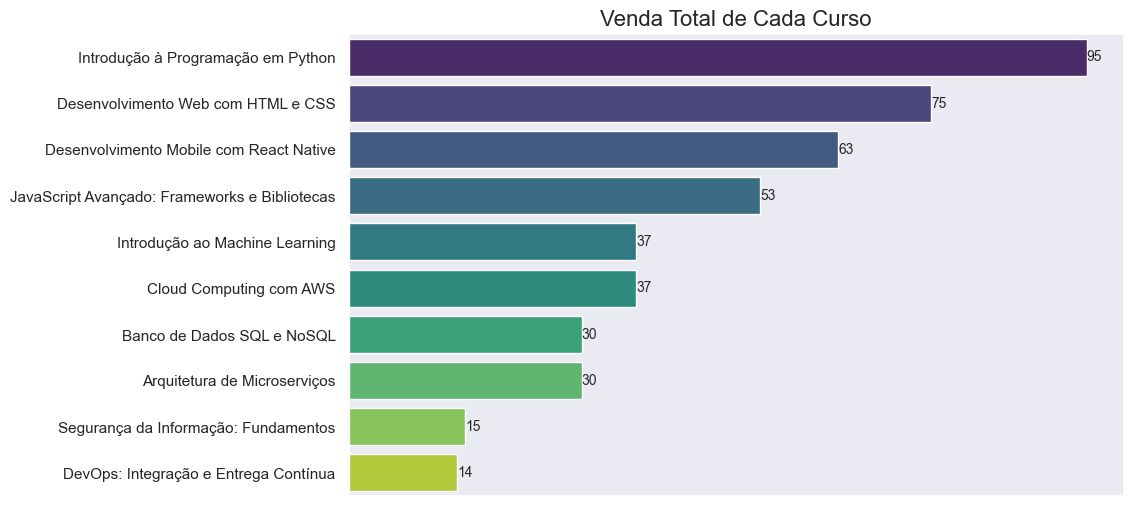

In [13]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="dark")
ax = sns.barplot(x="Quantidade Total de Vendas",y="Nome do Curso",data=df_Stime,\
                 hue='Nome do Curso', palette='viridis', legend=False)
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.0f')
plt.title('Venda Total de Cada Curso', fontsize=16)
plt.xlabel('')
plt.ylabel('')
ax.set_xticklabels([])
plt.show()

## <a> 3. Visualizando a Distribuição das Vendas ao Longo do Tempo </a>

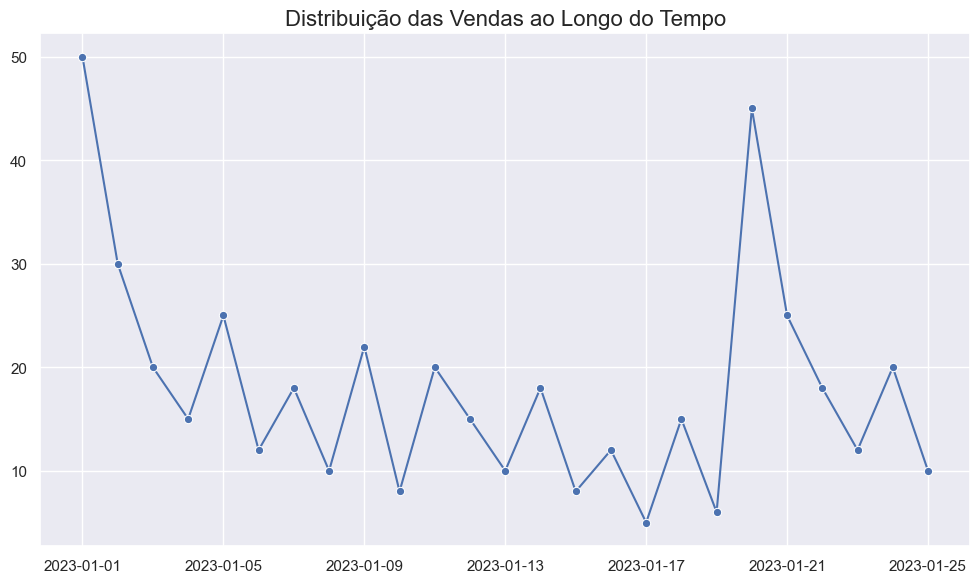

In [14]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x="Data", y="Quantidade de Vendas", data=df_original, marker="o", dashes=False)
plt.title('Distribuição das Vendas ao Longo do Tempo', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

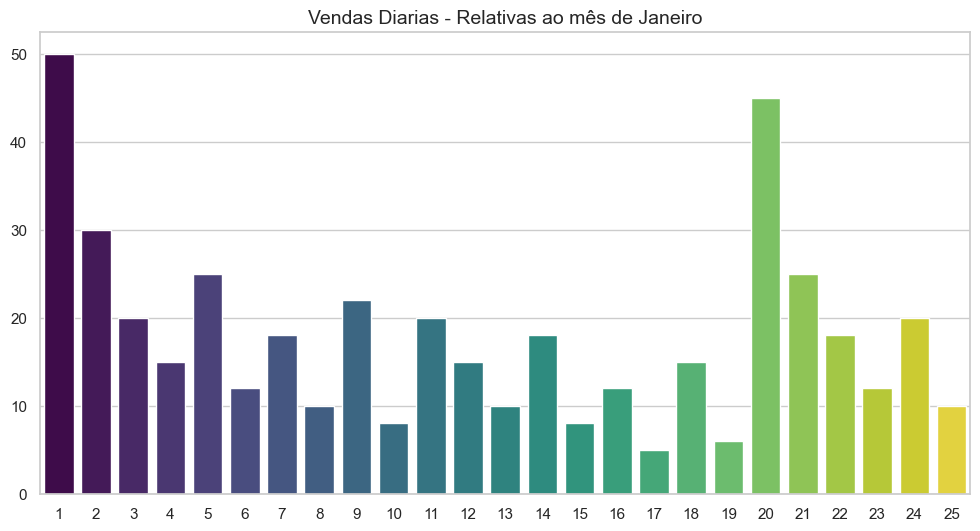

In [15]:
df_original['Dia'] = df_original['Data'].dt.day
vendas_diarias = df_original.groupby('Dia')['Quantidade de Vendas']\
    .sum().reset_index()
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_diarias, x='Dia', y='Quantidade de Vendas', hue='Dia',\
            palette='viridis', legend=False)
plt.title('Vendas Diarias - Relativas ao mês de Janeiro',fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()


## <a> 4. Distribuição das vendas pelo preço Unitário </a>

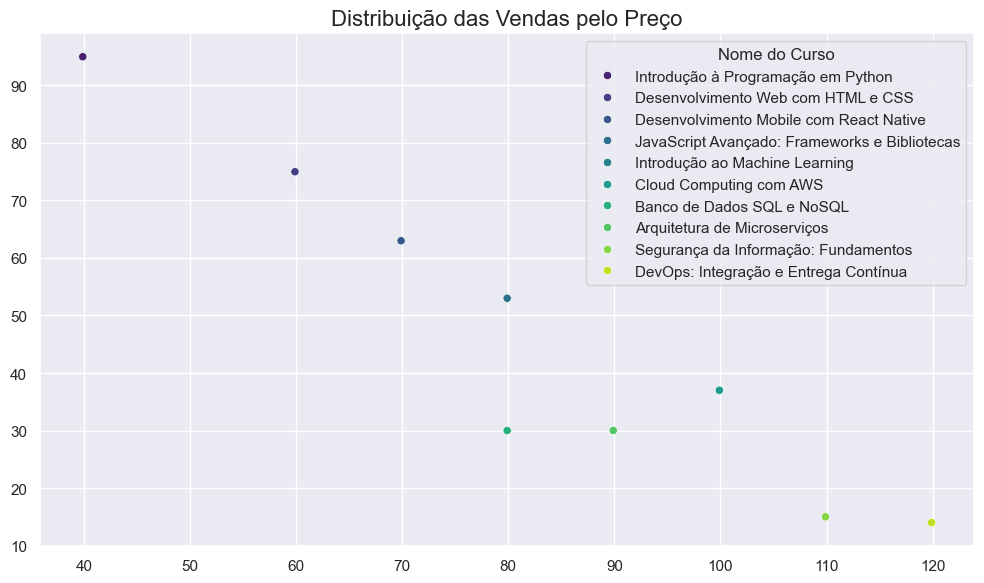

In [16]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_Stime, x="Preço Unitário", y="Quantidade Total de Vendas",\
                hue='Nome do Curso', palette='viridis',)

plt.title('Distribuição das Vendas pelo Preço', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

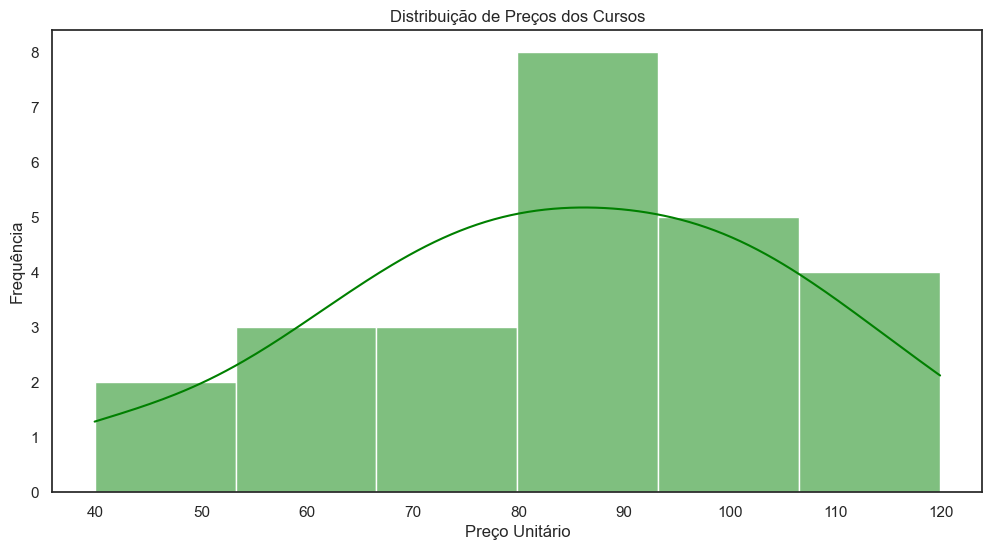

In [17]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="white")
sns.histplot(df_original['Preço Unitário'], kde=True, color='green')
plt.title('Distribuição de Preços dos Cursos')
plt.xlabel('Preço Unitário')
plt.ylabel('Frequência')
plt.show()

## <a> 5. Receita gerada por cada Curso </a>

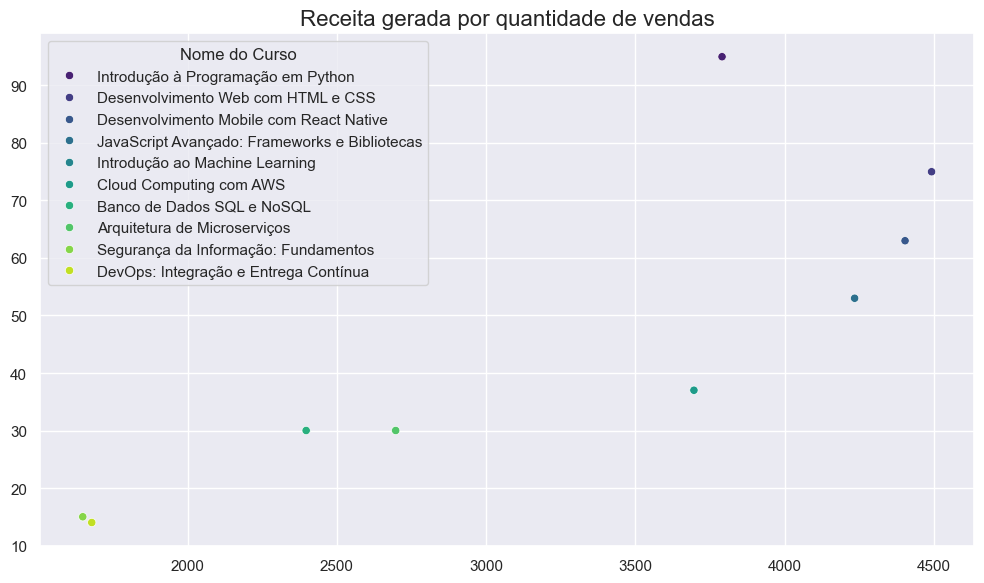

In [18]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_Stime, x="Receita_Gerada", y="Quantidade Total de Vendas",\
                hue='Nome do Curso', palette='viridis',)

plt.title('Receita gerada por quantidade de vendas', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

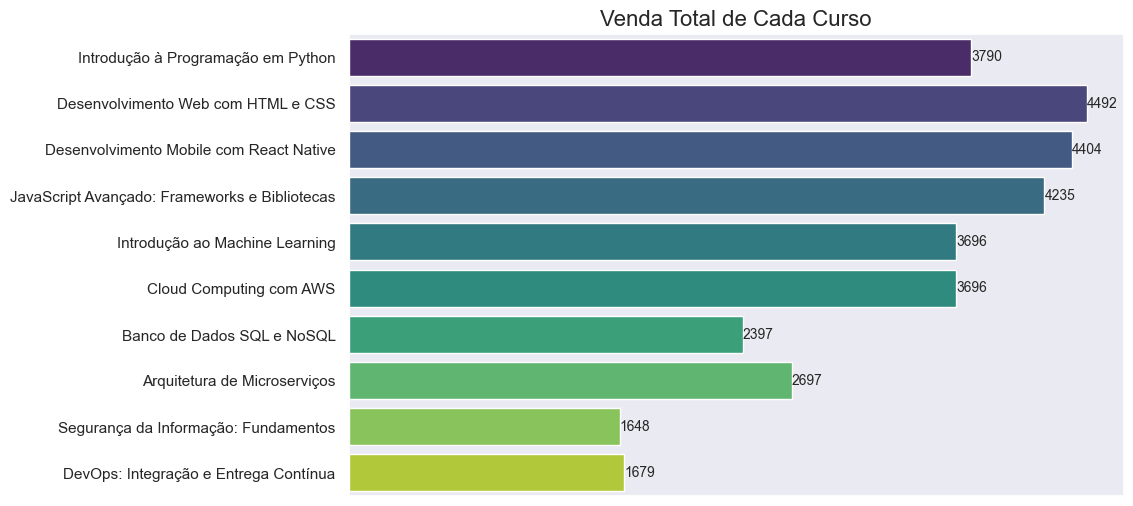

In [19]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="dark")
ax = sns.barplot(x="Receita_Gerada",y="Nome do Curso",data=df_Stime,\
                 hue='Nome do Curso', palette='viridis', legend=False)
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.0f')
plt.title('Venda Total de Cada Curso', fontsize=16)
plt.xlabel('')
plt.ylabel('')
ax.set_xticklabels([])
plt.show()

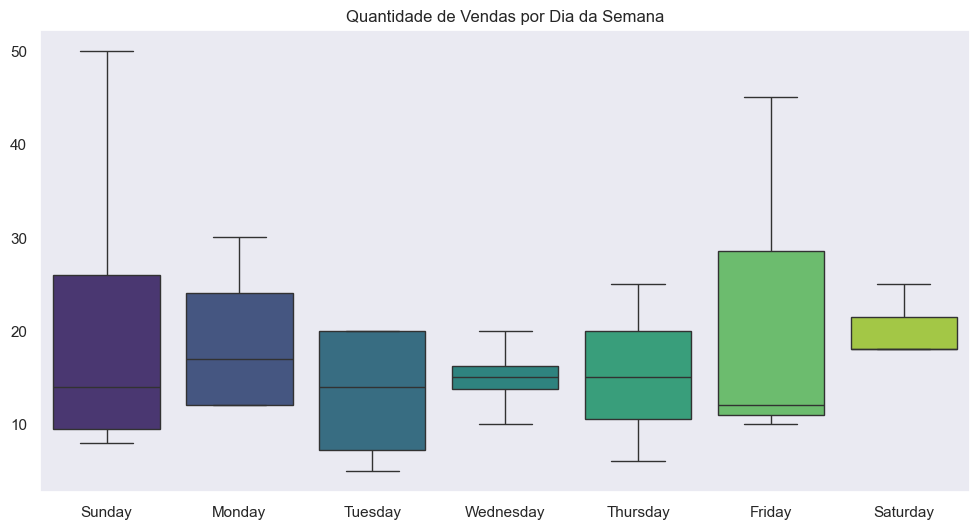

In [20]:
df_original['Dia da Semana'] = df_original['Data'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_original, x='Dia da Semana', y='Quantidade de Vendas',hue='Dia da Semana', palette='viridis')
plt.title('Quantidade de Vendas por Dia da Semana')
plt.xlabel('')
plt.ylabel('')
plt.show()